# Assigmnet-4 
# Subimited By Kush Kumar



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('/content/dataset_model.csv')
pd.set_option('display.max_rows', df.shape[0]+1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape


(614, 13)

In [4]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

# Identifying Potential Features in a dataset

In [7]:
len(df['Loan_ID'].unique())


614

In [8]:
#Saving the Loan ID in the sequence of application in another dataframe
df_id = df['Loan_ID']
#Dropping Loan ID from Featureset
df=df.drop(columns='Loan_ID')
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Perform feature Engineering on dataset


Continous Columns

In [9]:
num_cols = df._get_numeric_data().columns
cont_cols = []
for i in num_cols:
  if(len(df[i].unique())) > int(df.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


### Categorical Columns

In [10]:
cat_cols = list(set(df.columns) - set(cont_cols))
cat_cols

['Property_Area',
 'Credit_History',
 'Married',
 'Education',
 'Self_Employed',
 'Dependents',
 'Loan_Status',
 'Gender',
 'Loan_Amount_Term']

In [11]:
for i in cont_cols:
  print(str(i)+' : '+str(df[i].skew()))

ApplicantIncome : 6.539513113994625
CoapplicantIncome : 7.491531216657306
LoanAmount : 2.677551679256059


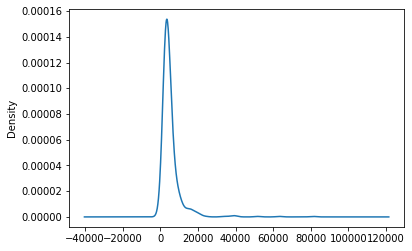

In [12]:
df['ApplicantIncome'].plot.kde()

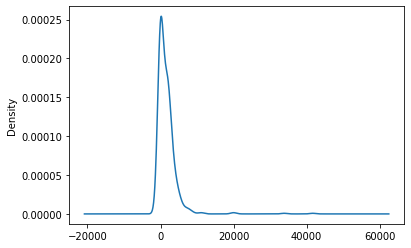

In [13]:
df['CoapplicantIncome'].plot.kde()

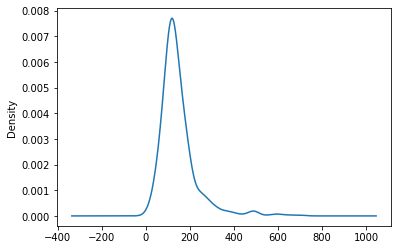

In [14]:
df['LoanAmount'].plot.kde()

## Outlier Handling 

In [15]:
for i in cont_cols:
  #Defning the lower & upper cap/cutoff
  lower_cutoff = df[i].quantile(0.05)
  upper_cutoff = df[i].quantile(0.95)
  #Replacing the Outliers from both ends with capped cutoffs
  df[i] = np.where(df[i] < lower_cutoff,lower_cutoff,df[i])
  df[i] = np.where(df[i] > upper_cutoff, upper_cutoff,df[i])
  print('Revised skew after Outlier handling '+str(i)+' : '+str(df[i].skew()))

Revised skew after Outlier handling ApplicantIncome : 1.7637799807028802
Revised skew after Outlier handling CoapplicantIncome : 0.8452039718003408
Revised skew after Outlier handling LoanAmount : 1.0594654991821644


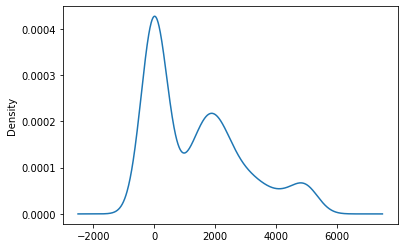

In [16]:

df['CoapplicantIncome'].plot.kde()

# Performing Log Transformation for Outlier Treatment

In [0]:
# df =df[(z < 3).all(axis=0)]

-0.18689617502427236


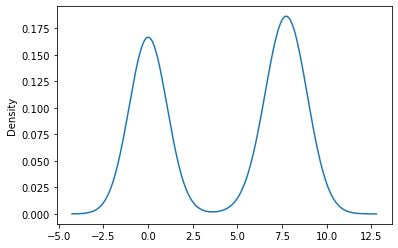

In [18]:
df["Log_CoapplicantIncome"] = df["CoapplicantIncome"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df['Log_CoapplicantIncome'].skew())
df['Log_CoapplicantIncome'].plot.kde()

In [19]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Log_CoapplicantIncome'],
      dtype='object')

# Handling Missing Data


In [20]:
mis_data =pd.DataFrame(df.count(axis=0)).reset_index()
mis_data.columns =["Feature","Total_Populated"]
mis_data =mis_data[(mis_data['Total_Populated'] < df.shape[0])]
mis_data

,Feature,Total_Populated
0,Gender,601
1,Married,611
2,Dependents,599
4,Self_Employed,582
7,LoanAmount,592
8,Loan_Amount_Term,600
9,Credit_History,564


In [21]:
rows_missing = df.isnull().sum(axis=1).reset_index() 
rows_missing.columns = ['row','mis_cnt']
rows_missing[(rows_missing['mis_cnt'] > int(df.shape[1]/3))]

,row,mis_cnt


In [22]:
df.mode().iloc[0]

Gender                        Male
Married                        Yes
Dependents                       0
Education                 Graduate
Self_Employed                   No
ApplicantIncome              14583
CoapplicantIncome                0
LoanAmount                      56
Loan_Amount_Term               360
Credit_History                   1
Property_Area            Semiurban
Loan_Status                      Y
Log_CoapplicantIncome            0
Name: 0, dtype: object

In [23]:
df[cat_cols].isnull().sum()

Property_Area        0
Credit_History      50
Married              3
Education            0
Self_Employed       32
Dependents          15
Loan_Status          0
Gender              13
Loan_Amount_Term    14
dtype: int64

In [0]:
for cols in cat_cols:
  if ( df[cols].isnull().sum() > 0):
    df[cols] = df[cols].fillna(df[cols].mode().iloc[0])

In [25]:
df[cat_cols].isnull().sum()

Property_Area       0
Credit_History      0
Married             0
Education           0
Self_Employed       0
Dependents          0
Loan_Status         0
Gender              0
Loan_Amount_Term    0
dtype: int64

In [26]:

df.median()

ApplicantIncome          3812.500000
CoapplicantIncome        1188.500000
LoanAmount                128.000000
Loan_Amount_Term          360.000000
Credit_History              1.000000
Log_CoapplicantIncome       7.080284
dtype: float64

In [27]:
df[cont_cols].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
dtype: int64

In [0]:
for cols in cont_cols:
  if ( df[cols].isnull().sum() > 0):
    df[cols] = df[cols].fillna(df[cols].median())

In [29]:
df[cont_cols].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

In [30]:

df.shape

(614, 13)

# Splitting across the Target variable & Label Encode


In [31]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Log_CoapplicantIncome'],
      dtype='object')

In [32]:

le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(df['Loan_Status']))
df_target.columns = (['Loan_Status'])
df_target.head()


,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [33]:
print(df_target['Loan_Status'].value_counts())
lbl_1,lbl_0 = df_target['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/df_target['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/df_target['Loan_Status'].count()))

1    422
0    192
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.72964169381108
Label 0 class %age: 31.270358306188925


In [34]:
df=df.drop(columns='Loan_Status')
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Log_CoapplicantIncome'],
      dtype='object')

# Label Encode the Categorical Columns


In [0]:
df_le = df.copy()

In [36]:
cat_cols = list(set(cat_cols) - set(['Loan_Status']))
cat_cols

['Property_Area',
 'Credit_History',
 'Married',
 'Education',
 'Self_Employed',
 'Dependents',
 'Gender',
 'Loan_Amount_Term']

In [37]:
for j in cat_cols :
  df_le['enc_'+str(j)] = le.fit_transform(df_le[j])
df_loan_le = df_le.drop(columns = cat_cols)
df_loan_le.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Log_CoapplicantIncome,enc_Property_Area,enc_Credit_History,enc_Married,enc_Education,enc_Self_Employed,enc_Dependents,enc_Gender,enc_Loan_Amount_Term
0,5849.0,0.0,128.0,0.000000,2,1,0,0,0,0,1,8
1,4583.0,1508.0,128.0,7.318540,0,1,1,0,0,1,1,8
2,3000.0,0.0,66.0,0.000000,2,1,1,0,1,0,1,8
3,2583.0,2358.0,120.0,7.765569,2,1,1,1,0,0,1,8
4,6000.0,0.0,141.0,0.000000,2,1,0,0,0,0,1,8


In [38]:

df_loan_le.shape

(614, 12)

# OHE Categorical Columns

In [0]:
df_ohe = df.copy()

In [40]:
cat_cols

['Property_Area',
 'Credit_History',
 'Married',
 'Education',
 'Self_Employed',
 'Dependents',
 'Gender',
 'Loan_Amount_Term']

In [41]:
for j in cat_cols :
   df_ohe = pd.get_dummies(df_ohe, columns=[j], prefix=[j] )
df_ohe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Log_CoapplicantIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.0,Credit_History_1.0,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Gender_Female,Gender_Male,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0
0,5849.0,0.0,128.0,0.000000,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,4583.0,1508.0,128.0,7.318540,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,3000.0,0.0,66.0,0.000000,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,2583.0,2358.0,120.0,7.765569,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,6000.0,0.0,141.0,0.000000,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [42]:
df_ohe.shape

(614, 31)

# Train Test Split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df_ohe, df_target, test_size=0.25, random_state=0 , stratify=df_target)

In [44]:
print("Train Feature set:\t"+str(len(X_train)))
print("Train Label Feature set:\t"+str(len(Y_train)))
print("Test Feature set:\t"+str(len(X_test)))
print("Test label set:\t"+str(len(Y_test)))

Train Feature set:	460
Train Label Feature set:	460
Test Feature set:	154
Test label set:	154


In [45]:
#Stratified Sampling
print("For Training Data :")
print(Y_train['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_train['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_train['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_train['Loan_Status'].count()))
print("\nFor Test Set :")
print(Y_test['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_test['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_test['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_test['Loan_Status'].count()))

For Training Data :
1    316
0    144
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.69565217391305
Label 0 class %age: 31.304347826086957

For Test Set :
1    106
0     48
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.83116883116882
Label 0 class %age: 31.16883116883117


# Logistic Regression

In [46]:
clf= LogisticRegression(random_state=0)
clf.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:

y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [48]:
print("Parameter tuning without GridSearch")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Logisticregression Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of Logisticregressione Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of Logisticregression Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of Logisticregression Model:")
print (f1_score(Y_test, y_pred))

Parameter tuning without GridSearch
Confusion Matrix
[[ 23  25]
 [  2 104]]
Accuracy of Logisticregression Model:
0.8246753246753247
Precision of Logisticregressione Model:
0.8062015503875969
Recall of Logisticregression Model:
0.9811320754716981
F1 Score of Logisticregression Model:
0.8851063829787235


In [49]:
#applying grid search
clf = LogisticRegression()
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
CV_Lr = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 3)
CV_Lr.fit(X_train, Y_train)
clf_best_dt = CV_Lr.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
print("Parameter tuning after GridSearch")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Randomforest Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of Randomforest Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of Randomforest Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of Randomforest Model:")
print (f1_score(Y_test, y_pred))

Parameter tuning after GridSearch
Confusion Matrix
[[ 23  25]
 [  1 105]]
Accuracy of Randomforest Model:
0.8311688311688312
Precision of Randomforest Model:
0.8076923076923077
Recall of Randomforest Model:
0.9905660377358491
F1 Score of Randomforest Model:
0.8898305084745762


In [51]:
roc_auc_score(Y_test,y_pred)

0.7348663522012577

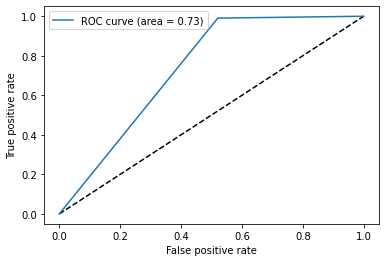

In [52]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

# Using RandomForest Classifier

In [53]:
clf_RFC = RandomForestClassifier(random_state=40)
clf_RFC.fit(X_train,Y_train)
y_pred = clf_RFC.predict(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
print("Parameter tuning without GridSearch")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Randomforest Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of Randomforest Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of Randomforest Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of Randomforest Model:")
print (f1_score(Y_test, y_pred))

Parameter tuning without GridSearch
Confusion Matrix
[[ 24  24]
 [  6 100]]
Accuracy of Randomforest Model:
0.8051948051948052
Precision of Randomforest Model:
0.8064516129032258
Recall of Randomforest Model:
0.9433962264150944
F1 Score of Randomforest Model:
0.8695652173913043


In [55]:
clf_RFC = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=clf_RFC, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, Y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [56]:
y_pred = clf_best_dt.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
print("####Parameter tuning after GridSearch###")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Randomforest Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of Randomforest Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of Randomforest Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of Randomforest Model:")
print (f1_score(Y_test, y_pred))

####Parameter tuning after GridSearch###
Confusion Matrix
[[ 23  25]
 [  1 105]]
Accuracy of Randomforest Model:
0.8311688311688312
Precision of Randomforest Model:
0.8076923076923077
Recall of Randomforest Model:
0.9905660377358491
F1 Score of Randomforest Model:
0.8898305084745762


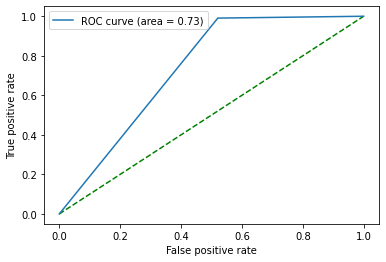

In [58]:

fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'g--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

# Which approach between Label Encoding & One Hot Encoding gave better results in case of both the algorithms used ?

* In Random Forest Classfication the ml model perform better on One Hot Encoding data 
* In logistic regression both the Label Encoding & One Hot Encoding approximately similar prediction